In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Omega = 100
alpha = 2.5
epsilon = 0.01
gamma = 1
beta = 0.3

N_samples = 200
M_initial = 0
N_initial = 1

T = 100
times_ensemble = []
infected_ensemble = []
immune_ensemble = []

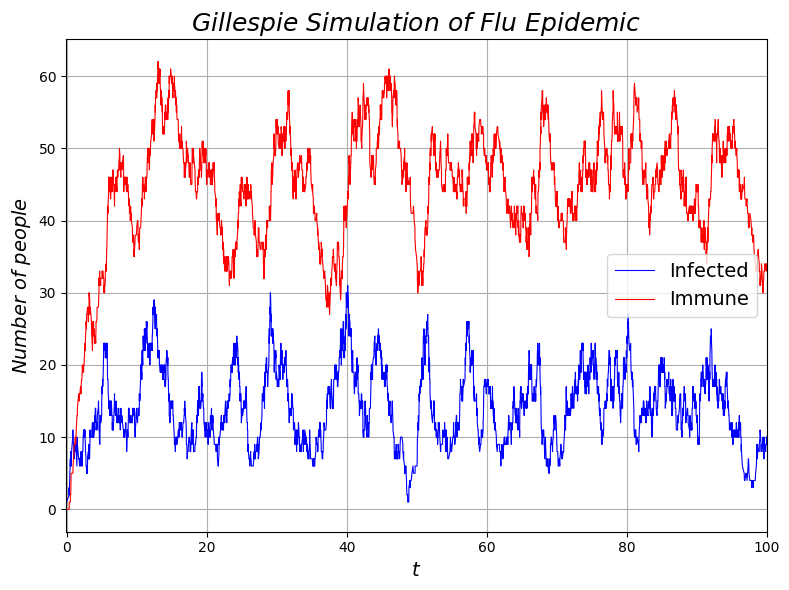

In [6]:
for sample in range(N_samples):
    M = M_initial
    N = N_initial
    t = 0
    times = [t]
    infected = [N]
    immune = [M]
    
    while t < T:
        a1 = alpha * N / Omega * (Omega - N - M) + epsilon * (Omega - N - M)
        a2 = gamma * N
        a3 = beta * M
        a0 = a1 + a2 +a3

        r1 = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        
        tau = (1 / a0) * np.log(1 / r1)
        t += tau

        if t > T:
            break

        if r2 * a0 < a1:
            N += 1
        elif r2 * a0 < a1 + a2:
            N -= 1
            M += 1
        else:
            M -= 1
    
        times.append(t)
        infected.append(N)
        immune.append(M)
    
    times_ensemble.append(times)
    infected_ensemble.append(infected)
    immune_ensemble.append(immune)

fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(times_ensemble[0], infected_ensemble[0], 'b', linewidth = 0.8, label = 'Infected')
ax.plot(times_ensemble[0], immune_ensemble[0], 'r', linewidth = 0.8, label = 'Immune')
ax.set_xlabel('$t$', fontsize = 14)
ax.set_ylabel('$Number \ of \ people$', fontsize = 14)
ax.set_title('$Gillespie\ Simulation \ of \ Flu\ Epidemic$', fontsize = 18)
ax.set_xlim([-0.1, T])
ax.legend(fontsize = 14)

plt.grid()
fig.tight_layout()
plt.show()